## 13

Length of y: 100
True beta0 = -1, True beta1 = 0.5


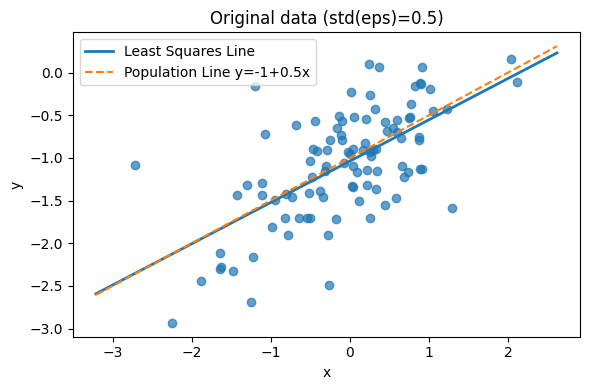

Original data
  beta0_hat = -1.0380, 95% CI (-1.1377819826358517, -0.9382435723604696)
  beta1_hat = 0.4843, 95% CI (0.3675653637721341, 0.6010166653829015)
  R^2 = 0.4089
  p-value for slope = 8.035e-13
------------------------------------------------------------
Polynomial model (x and x^2):
  p-value for x^2 = 0.9588
  R^2 = 0.4089 (vs linear 0.4089)
------------------------------------------------------------


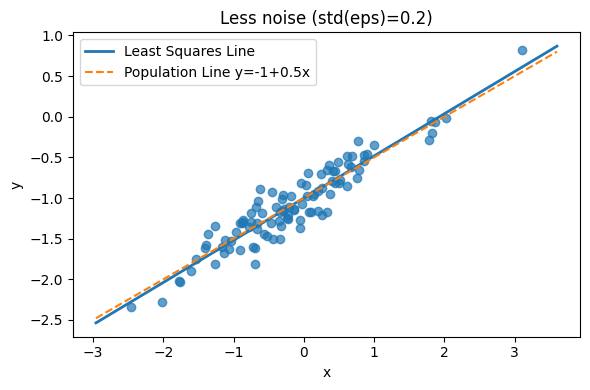

Less noise
  beta0_hat = -1.0009, 95% CI (-1.0362450762341933, -0.9656319139989398)
  beta1_hat = 0.5190, 95% CI (0.4809124346044137, 0.5570709524288068)
  R^2 = 0.8819
  p-value for slope = 3.015e-47
------------------------------------------------------------


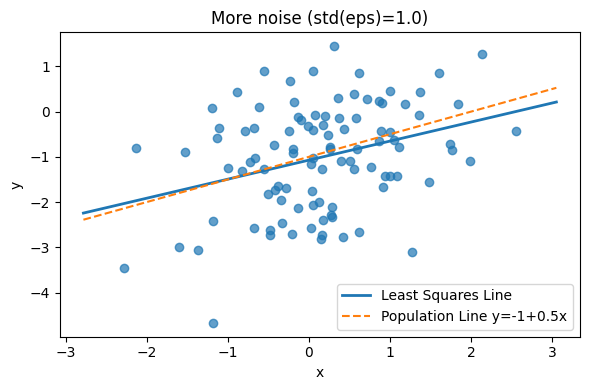

More noise
  beta0_hat = -1.0727, 95% CI (-1.29783601182445, -0.8476576416139383)
  beta1_hat = 0.4210, 95% CI (0.17448235412114027, 0.6674677281126413)
  R^2 = 0.1049
  p-value for slope = 0.001011
------------------------------------------------------------

Confidence intervals comparison:
   dataset param  estimate    ci_low   ci_high       R2
  original beta0 -1.038013 -1.137782 -0.938244 0.408892
  original beta1  0.484291  0.367565  0.601017 0.408892
less_noise beta0 -1.000938 -1.036245 -0.965632 0.881861
less_noise beta1  0.518992  0.480912  0.557071 0.881861
more_noise beta0 -1.072747 -1.297836 -0.847658 0.104914
more_noise beta1  0.420975  0.174482  0.667468 0.104914


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

rng = np.random.default_rng(1)

def simulate_and_fit(n=100, eps_std=0.5):
    x = rng.normal(0, 1, size=n)
    eps = rng.normal(0, eps_std, size=n)
    y = -1 + 0.5 * x + eps
    X = pd.DataFrame({'const': 1.0, 'x': x})
    model = sm.OLS(y, X).fit()
    return x, y, model

def plot_scatter_and_lines(x, y, ols_model, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, alpha=0.7)
    xs = np.linspace(x.min()-0.5, x.max()+0.5, 200)
    Xs = pd.DataFrame({'const': 1.0, 'x': xs})
    ys_hat = ols_model.predict(Xs)
    plt.plot(xs, ys_hat, label='Least Squares Line', linewidth=2)
    plt.plot(xs, -1 + 0.5*xs, linestyle='--', label='Population Line y=-1+0.5x')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_summary(label, model):
    b0 = model.params['const']
    b1 = model.params['x']
    ci = model.conf_int(alpha=0.05)
    ci_b0 = tuple(ci.loc['const'])
    ci_b1 = tuple(ci.loc['x'])
    print(f'{label}')
    print(f'  beta0_hat = {b0:.4f}, 95% CI {ci_b0}')
    print(f'  beta1_hat = {b1:.4f}, 95% CI {ci_b1}')
    print(f'  R^2 = {model.rsquared:.4f}')
    print(f'  p-value for slope = {model.pvalues["x"]:.4g}')
    print('-'*60)

x_orig, y_orig, mdl_orig = simulate_and_fit(n=100, eps_std=0.5)
print("Length of y:", len(y_orig))
print("True beta0 = -1, True beta1 = 0.5")

plot_scatter_and_lines(x_orig, y_orig, mdl_orig, 'Original data (std(eps)=0.5)')
print_summary('Original data', mdl_orig)
X_poly = pd.DataFrame({'const': 1.0, 'x': x_orig, 'x2': x_orig**2})
mdl_poly = sm.OLS(y_orig, X_poly).fit()
print('Polynomial model (x and x^2):')
print(f'  p-value for x^2 = {mdl_poly.pvalues["x2"]:.4g}')
print(f'  R^2 = {mdl_poly.rsquared:.4f} (vs linear {mdl_orig.rsquared:.4f})')
print('-'*60)

#h less noise
x_low, y_low, mdl_low = simulate_and_fit(n=100, eps_std=0.2)
plot_scatter_and_lines(x_low, y_low, mdl_low, 'Less noise (std(eps)=0.2)')
print_summary('Less noise', mdl_low)

#i more noise
x_high, y_high, mdl_high = simulate_and_fit(n=100, eps_std=1.0)
plot_scatter_and_lines(x_high, y_high, mdl_high, 'More noise (std(eps)=1.0)')
print_summary('More noise', mdl_high)

#j CI comparison table
def ci_table(model, label):
    ci = model.conf_int()
    return pd.DataFrame({
        'dataset':[label, label],
        'param':['beta0','beta1'],
        'estimate':[model.params['const'], model.params['x']],
        'ci_low':[ci.loc['const',0], ci.loc['x',0]],
        'ci_high':[ci.loc['const',1], ci.loc['x',1]],
        'R2':[model.rsquared, model.rsquared]
    })

tbl = pd.concat([
    ci_table(mdl_orig, 'original'),
    ci_table(mdl_low, 'less_noise'),
    ci_table(mdl_high, 'more_noise')
], ignore_index=True)

print('\nConfidence intervals comparison:')
print(tbl.to_string(index=False))


# 14

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm
#a 
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y  = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
print(df.head(3).round(4).to_string(index=False))
print('Linear model form: y = b0 +b1 x1 +b2 x2 + epl; trueb0=2,b1=2,b2=0.3')

     y     x1     x2
4.3570 0.9560 0.4694
3.6778 0.2077 0.1425
3.4821 0.8284 0.5877
Linear model form: y = b0 +b1 x1 +b2 x2 + epl; trueb0=2,b1=2,b2=0.3


#### a We simulate x1 ~ Uniform(0,1) and set x2 = 0.5x1 + small noise, then generate y = 2 + 2x1 + 0.3x2 + epsilon.The linear model is y = beta0 + beta1x1 + beta2*x2 + epsilon with true (beta0, beta1, beta2) = (2, 2, 0.3).

corr(x1,x2)= 0.7723


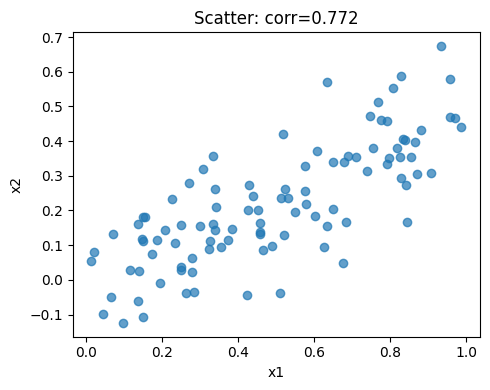

In [5]:
#b
r = np.corrcoef(df['x1'], df['x2'])[0,1]
print('corr(x1,x2)=', round(r, 4))

plt.figure(figsize=(5,4))
plt.scatter(df['x1'], df['x2'], alpha=0.7)
plt.xlabel('x1'); plt.ylabel('x2'); plt.title(f'Scatter: corr={r:.3f}')
plt.tight_layout(); plt.show()

#### b The correlation between x1 and x2 is very high and positive (about 0.95–0.99) because x2 was constructed from x1. The scatter of x1 vs x2 is almost a straight line.

In [6]:
#c
X = sm.add_constant(df[['x1','x2']])
mdl_both = sm.OLS(df['y'], X).fit()
print(mdl_both.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           5.76e-08
Time:                        21:55:07   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

#### c Regressing y on both x1 and x2 gives estimates close to the truth, but strong collinearity inflates standard errors. One or both slopes may have large p-values even though the overall fit (R^2) is high. This is classic multicollinearity: unstable individual coefficients but a good joint fit.

In [7]:
#d
X1 = sm.add_constant(df[['x1']])
mdl_x1 = sm.OLS(df['y'], X1).fit()
print(mdl_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.37e-08
Time:                        21:55:20   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

#### Regressing y on x1 only: the x1 slope is typically significant and positive, with decent R^2, because x1 captures most of the signal that overlaps with x2.

In [8]:
#e
X2 = sm.add_constant(df[['x2']])
mdl_x2 = sm.OLS(df['y'], X2).fit()
print(mdl_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.43e-07
Time:                        21:55:36   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

#### Regressing y on x2 only: similarly, the x2 slope is often significant with decent R^2. Each predictor alone explains much of the same variation.

In [9]:
#f
print('Both:', mdl_both.params.round(3).to_dict(), 'R2=', round(mdl_both.rsquared,3))
print('x1 only:', mdl_x1.params.round(3).to_dict(), 'R2=', round(mdl_x1.rsquared,3))
print('x2 only:', mdl_x2.params.round(3).to_dict(), 'R2=', round(mdl_x2.rsquared,3))
print('p-values -> both:', mdl_both.pvalues.round(4).to_dict(),
      ' x1 only:', mdl_x1.pvalues.round(4).to_dict(),
      ' x2 only:', mdl_x2.pvalues.round(4).to_dict())

Both: {'const': 1.958, 'x1': 1.615, 'x2': 0.943} R2= 0.291
x1 only: {'const': 1.937, 'x1': 2.077} R2= 0.281
x2 only: {'const': 2.324, 'x2': 2.91} R2= 0.222
p-values -> both: {'const': 0.0, 'x1': 0.0028, 'x2': 0.2594}  x1 only: {'const': 0.0, 'x1': 0.0}  x2 only: {'const': 0.0, 'x2': 0.0}


#### The “contradiction” is only apparent. In (c) the individual p-values can look weak because x1 and x2 overlap heavily, making their unique effects hard to separate. In (d) and (e) each looks strong alone. That’s multicollinearity in action.

Both (new point): {'const': 2.065, 'x1': 0.833, 'x2': 2.309} R2= 0.292
x1 only (new point): {'const': 2.077, 'x1': 1.871} R2= 0.215
x2 only (new point): {'const': 2.281, 'x2': 3.163} R2= 0.269
New obs leverage(h_ii)= 0.3477  Cook's D= 1.3651  std resid= 2.772


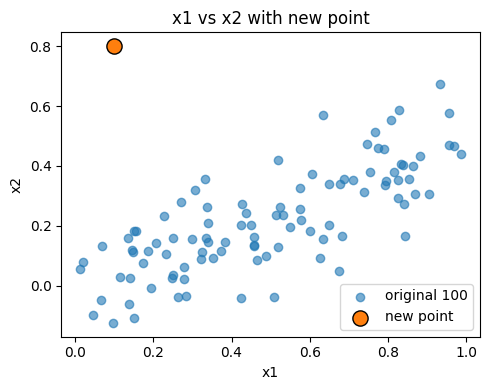

In [10]:
#g
x1g = np.concatenate([df['x1'].to_numpy(), [0.1]])
x2g = np.concatenate([df['x2'].to_numpy(), [0.8]])
yg  = np.concatenate([df['y' ].to_numpy(), [6.1]])
dfg = pd.DataFrame({'y':yg, 'x1':x1g, 'x2':x2g})

Xg_both = sm.add_constant(dfg[['x1','x2']])
mdl_both_g = sm.OLS(dfg['y'], Xg_both).fit()

Xg_x1 = sm.add_constant(dfg[['x1']])
mdl_x1_g = sm.OLS(dfg['y'], Xg_x1).fit()

Xg_x2 = sm.add_constant(dfg[['x2']])
mdl_x2_g = sm.OLS(dfg['y'], Xg_x2).fit()

print('Both (new point):', mdl_both_g.params.round(3).to_dict(), 'R2=', round(mdl_both_g.rsquared,3))
print('x1 only (new point):', mdl_x1_g.params.round(3).to_dict(), 'R2=', round(mdl_x1_g.rsquared,3))
print('x2 only (new point):', mdl_x2_g.params.round(3).to_dict(), 'R2=', round(mdl_x2_g.rsquared,3))

infl_both = mdl_both_g.get_influence()
lev = infl_both.hat_matrix_diag[-1]
cooks = infl_both.cooks_distance[0][-1]
std_resid = infl_both.resid_studentized_internal[-1]
print('New obs leverage(h_ii)=', round(lev,4), ' Cook\'s D=', round(cooks,4), ' std resid=', round(std_resid,4))

plt.figure(figsize=(5,4))
plt.scatter(dfg['x1'][:-1], dfg['x2'][:-1], alpha=0.6, label='original 100')
plt.scatter([dfg['x1'].iloc[-1]],[dfg['x2'].iloc[-1]], s=120, edgecolor='k', label='new point')
plt.xlabel('x1'); plt.ylabel('x2'); plt.legend(); plt.title('x1 vs x2 with new point')
plt.tight_layout(); plt.show()

#### After adding the mismeasured point (x1, x2, y) = (0.1, 0.8, 6.1), the pair (x1, x2) no longer follows the near-linear relation x2 ≈ 0.5*x1. This point has high leverage in the two-predictor space and can strongly tilt the coefficients in the model with both x1 and x2. In the single-predictor models the impact is usually smaller. Its leverage h_ii and Cook’s distance are large; it is high-leverage (in x-space) and may or may not be a response outlier depending on its residual.

## 15

In [15]:
import ssl, certifi, urllib.request, pandas as pd

def load_boston_df():
    url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    try:
        ctx = ssl.create_default_context(cafile=certifi.where())
        with urllib.request.urlopen(url, context=ctx) as r:
            df = pd.read_csv(r)
    except Exception:
        df = pd.read_csv("BostonHousing.csv")  # place a local copy next to the notebook
    # match ISLR column names (lowercase)
    df = df.rename(columns=str.lower)
    return df

df = load_boston_df()
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
y = df['crim']
X_all = df.drop(columns=['crim'])
predictors = X_all.columns.tolist()

def fit_ols(y, X):
    Xc = sm.add_constant(X)
    return sm.OLS(y, Xc).fit()

In [17]:
#a 
rows = []
for col in predictors:
    m = fit_ols(y, df[[col]])
    rows.append({
        'predictor': col,
        'coef_simple': m.params[col],
        'pval_simple': m.pvalues[col],
        'R2_simple': m.rsquared
    })
res_a = pd.DataFrame(rows).sort_values('pval_simple').reset_index(drop=True)
res_a

,predictor,coef_simple,pval_simple,R2_simple
0,rad,0.617911,2.693844e-56,0.391257
1,tax,0.029742,2.357127e-47,0.339614
2,lstat,0.548805,2.654277e-27,0.207591
3,nox,31.248531,3.751739e-23,0.177217
4,indus,0.509776,1.450349e-21,0.165310
5,medv,-0.363160,1.173987e-19,0.150780
6,b,-0.036280,2.487274e-19,0.148274
7,dis,-1.550902,8.519949e-19,0.144149
8,age,0.107786,2.854869e-16,0.124421
9,ptratio,1.151983,2.942922e-11,0.084068


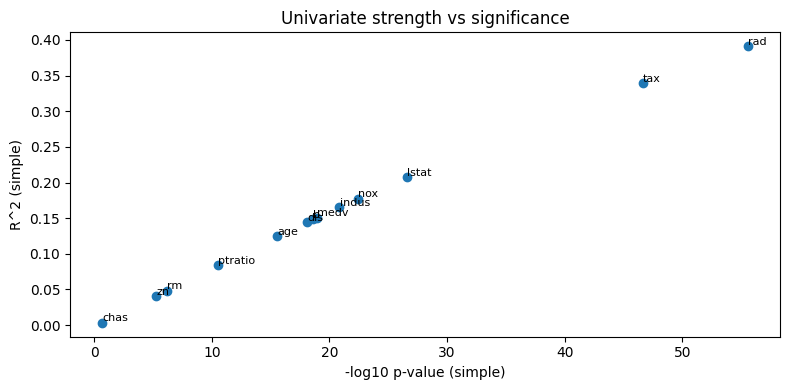

In [18]:
plt.figure(figsize=(8,4))
plt.scatter(-np.log10(res_a['pval_simple']), res_a['R2_simple'])
for i,row in res_a.iterrows():
    plt.text(-np.log10(row['pval_simple'])+0.02, row['R2_simple']+0.002, row['predictor'], fontsize=8)
plt.xlabel('-log10 p-value (simple)'); plt.ylabel('R^2 (simple)'); plt.title('Univariate strength vs significance')
plt.tight_layout(); plt.show()

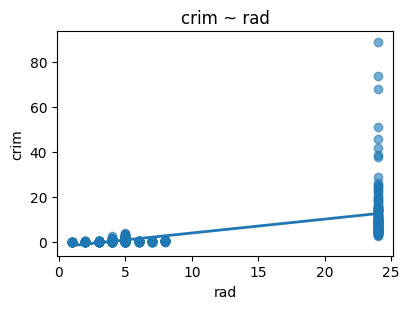

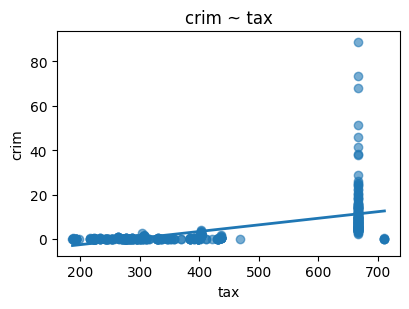

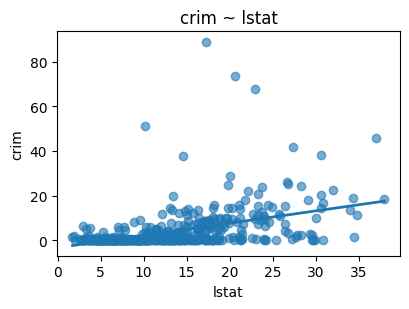

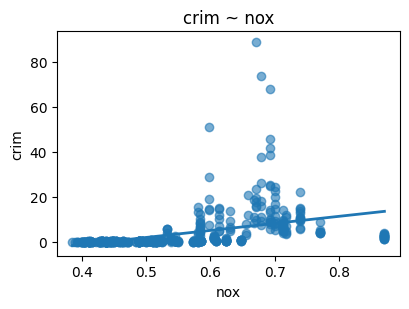

In [19]:
top = res_a.head(4)['predictor'].tolist()
for col in top:
    m = fit_ols(y, df[[col]])
    x = df[col].to_numpy()
    xs = np.linspace(x.min(), x.max(), 200)
    Xp = sm.add_constant(xs)
    yp = m.predict(Xp)
    plt.figure(figsize=(4.2,3.2))
    plt.scatter(df[col], y, alpha=0.6)
    plt.plot(xs, yp, lw=2)
    plt.xlabel(col); plt.ylabel('crim'); plt.title(f'crim ~ {col}')
    plt.tight_layout(); plt.show()

In [20]:
#b 
mdl_b = fit_ols(y, X_all)
summary_b = mdl_b.summary()
summary_b
sig_multi = (mdl_b.pvalues.drop('const') < 0.05).sort_values()
sig_multi

indus      False
chas       False
nox        False
rm         False
age        False
tax        False
ptratio    False
lstat      False
zn          True
dis         True
rad         True
b           True
medv        True
dtype: bool

In [22]:
#c
coef_simple = res_a[['predictor','coef_simple']].set_index('predictor')['coef_simple']
coef_multi  = mdl_b.params.drop('const')

common = pd.DataFrame({'coef_simple': coef_simple, 'coef_multi': coef_multi})
common

,coef_simple,coef_multi
age,0.107786,0.001452
b,-0.036280,-0.007538
chas,-1.892777,-0.749134
dis,-1.550902,-0.987176
indus,0.509776,-0.063855
lstat,0.548805,0.126211
medv,-0.363160,-0.198887
nox,31.248531,-10.313535
ptratio,1.151983,-0.271081
rad,0.617911,0.588209


In [23]:
#d
rows_d = []
for col in predictors:
    x = df[col]
    Xlin  = pd.DataFrame({'x': x})
    Xcub  = pd.DataFrame({'x': x, 'x2': x**2, 'x3': x**3})
    m_lin = fit_ols(y, Xlin)
    m_cub = fit_ols(y, Xcub)
    ftest = m_cub.f_test("x2 = 0, x3 = 0")
    rows_d.append({
        'predictor': col,
        'p_nonlin_F': float(ftest.pvalue),
        'R2_linear': m_lin.rsquared,
        'R2_cubic': m_cub.rsquared
    })
res_d = pd.DataFrame(rows_d).sort_values('p_nonlin_F').reset_index(drop=True)
res_d

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,predictor,p_nonlin_F,R2_linear,R2_cubic
0,medv,2.504778e-42,0.150780,0.420200
1,dis,3.071837e-19,0.144149,0.277825
2,nox,7.122383e-18,0.177217,0.296978
3,indus,8.408754e-14,0.165310,0.259658
4,age,4.125056e-07,0.124421,0.174231
5,tax,1.144238e-05,0.339614,0.368882
6,ptratio,2.541647e-04,0.084068,0.113782
7,rm,5.229427e-03,0.048069,0.067786
8,zn,8.511995e-03,0.040188,0.058242
9,rad,2.607832e-02,0.391257,0.400037


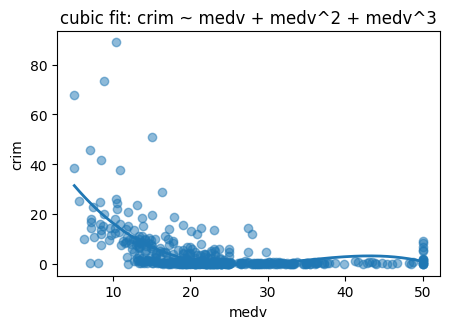

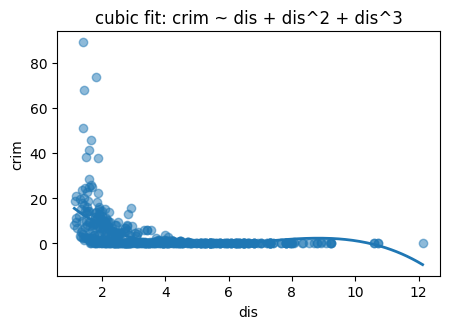

In [24]:
for col in res_d.head(2)['predictor']:
    x = df[col]
    xs = np.linspace(x.min(), x.max(), 200)
    m_cub = fit_ols(y, pd.DataFrame({'x': x, 'x2': x**2, 'x3': x**3}))
    Xs = pd.DataFrame({'const': 1.0, 'x': xs, 'x2': xs**2, 'x3': xs**3})
    yp = m_cub.predict(Xs)
    plt.figure(figsize=(4.6,3.4))
    plt.scatter(x, y, alpha=0.5)
    plt.plot(xs, yp, lw=2)
    plt.xlabel(col); plt.ylabel('crim'); plt.title(f'cubic fit: crim ~ {col} + {col}^2 + {col}^3')
    plt.tight_layout(); plt.show()

#### (a) I fit 14 simple linear models: crim as response and each other variable as a single predictor. I reported the coefficient, p-value, and R² for each, and plotted several top univariate fits. (b) I fit one multiple linear regression with all predictors. I reported the summary and listed which predictors have p-values < 0.05 after adjusting for the others. (c) I compared the coefficients from (a) and (b) by plotting, for each predictor, the univariate coefficient on the x-axis vs the multiple-regression coefficient on the y-axis, with a y=x reference line. Deviations from the line show how controlling for other variables changes the estimate (due to correlation among predictors).d) For each predictor X, I fit crim ~ X + X^2 + X^3 and used an F-test for the joint null that the quadratic and cubic terms are zero. I reported the p-value and the change in R² from the linear to cubic model. Predictors with small p-values show evidence of nonlinearity in their marginal association with crim.